# Identifying publications in questionable journals in the context of performance-based research funding (Flanders, Belgium)

This notebook accompanies an article in preparation, in which we carry out an analysis of the publications that appeared in journals which were identified as being 'predatory' open access. The analysis is based on an anonymized set of publications derived from the Flemish [VABB-SHW database](https://www.ecoom.be/nodes/vabb/en). 

## Table of contents

* [Setup](#Setup)
* Description of data
* Descriptive statistics
* Distribution of publications (absolute counts) in POA journals, journals indexed by DOAJ, and other peer-reviewed journals
* Distribution of POA journals (absolute counts) classified by Fields of Science OECD coding scheme [(link to OECD manual)](http://www.oecd.org/science/inno/38235147.pdf)]
* Number (and column-wise proportions) of POA, DOAJ indexed and peer-reviewed publications with n authors]
* Average proportion of senior authors relative to all authors (senior and junior) for POA publications]
* Proportion of junior vs. senior authors positioned first in the author byline of POA publications]
* Heatmap of cognitive (rows) and organizational (columns) classification of POA publications]

## Setup
First, we load some required packages and set a few options.

In [1]:
# data analysis
import pandas as pd
pd.set_option('precision', 4)
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Description of data

In [2]:
df = pd.read_csv("data/POA_dataset.csv", delimiter=';')

In [3]:
# Which columns are stored?
df.columns

Index(['pub_id', 'pub_year', 'journal_id', 'fos_lv1', 'fos_lv2', 'auth_id',
       'auth_in_place', 'number_of_auth_tot_article', 'number_of_auth_in_VABB',
       'senior', 'Social health sciences', 'Psychology', 'Economics',
       'Educational sciences', 'Sociology', 'Law', 'Criminology',
       'Political sciences', 'Communication sciences',
       'Social sciences general', 'History', 'Archaeology', 'Language',
       'Philosophy', 'Arts, achitecture and art history', 'Other disciplines',
       'Humanities general'],
      dtype='object')

In [4]:
# let's look at first two rows of dataframe
df.head(2)

,pub_id,pub_year,journal_id,fos_lv1,fos_lv2,auth_id,auth_in_place,number_of_auth_tot_article,number_of_auth_in_VABB,senior,...,Political sciences,Communication sciences,Social sciences general,History,Archaeology,Language,Philosophy,"Arts, achitecture and art history",Other disciplines,Humanities general
0,0,2008,7,5. Social sciences,5.7 Social and economic geography,6,8,9,5,0,...,0,0,1,0,0,0,0,0,1,0
1,0,2008,7,5. Social sciences,5.7 Social and economic geography,50,9,9,5,1,...,0,0,1,0,0,0,0,0,1,0


The dataframe contains information about the publications which appeared in POA journals.
Each row contains standardized metadata of the publications and information for each of it's authors (if affiliated to a Flemish University).

Description of variables/columns:
    - ['pub_id'] : unique identifier for publication
    - ['pub_year'] : publication year for each publication
    - ['journal_id'] : unique identifiers for each journal
    - ['fos_lv1'] : level 1 cognitive classification of the publication based on OECD Fields of Science discipline code assigned to the journal
    - ['fos_lv2'] : level 2 " "
    - ['auth_id'] : unique identifier for authors 
    - ['auth_in_place'] : position (numerical) of each author in byline of publication
    - ['number_of_auth_tot_article'] : total number of authors in byline of publication
    - ['number_of_auth_in_VABB'] : total number of authors in byline who are in VABB
    - ['senior'] : boolean (true/false) for seniority status of each author
    - ['Social health sciences', 'Psychology',
       'Economics', 'Educational sciences', 'Sociology', 'Law', 'Criminology',
       'Political sciences', 'Communication sciences',
       'Social sciences general', 'History', 'Archaeology', 'Language',
       'Philosophy', 'Arts, achitecture and art history', 'Humanities general',
       'Other disciplines'] : organizational classification of the publication based on author affiliations

## Descriptive statistics

In [5]:
print('The number of authors: {}'.format(df.auth_id.nunique()))
print('The number of journals: {}'.format(df.journal_id.nunique()))
print('The number of articles: {}'.format(df.pub_id.nunique()))

The number of authors: 341
The number of journals: 144
The number of articles: 210


## Distribution of publications (absolute counts) in POA journals, journals indexed by DOAJ, and other peer-reviewed journals

In [6]:
display(df.groupby(['pub_year'])['pub_id','journal_id'].nunique().reset_index().rename(columns=
                                                                              {'pub_year':'Publication year',
                                                                               'pub_id':'Publications', 
                                                                               'journal_id':'Journals'}
                                                                             ))

,Publication year,Publications,Journals
0,2004,2,2
1,2005,4,4
2,2006,8,6
3,2007,9,8
4,2008,8,7
5,2009,10,10
6,2010,17,16
7,2011,27,25
8,2012,48,42
9,2013,35,32


## Distribution of POA journals (absolute counts) classified by Fields of Science OECD coding scheme [(link to OECD manual)](http://www.oecd.org/science/inno/38235147.pdf)

,Field of science code,N journals,Proportion
0,1. Natural sciences,20,0.1389
1,2. Engineering and technology,14,0.0972
2,3. Medical and Health sciences,48,0.3333
3,4. Agricultural sciences,4,0.0278
4,5. Social sciences,43,0.2986
5,6. Humanities,1,0.0069
6,General/very broad,14,0.0972


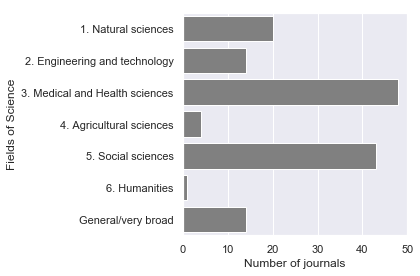

In [7]:
# Table for figure 1.
counts1 = df.groupby(['fos_lv1'])['journal_id'].nunique().reset_index().rename(columns=
                                                                              {'fos_lv1':'Field of science code',
                                                                               'journal_id':'N journals'}
                                                                             )
counts1['Proportion'] = counts1['N journals'] / counts1['N journals'].sum()

display(counts1)

# Figure 1. Distribution of POA journals (absolute counts) classified by Fields of Science OECD coding scheme (N = 144)
ax = sns.barplot(x = 'N journals', 
            y = 'Field of science code', 
            data=counts1, 
            color='Grey')

ax.set(xlim=(0, 50), 
       ylabel='Fields of Science',
       xlabel="Number of journals")
plt.tight_layout()
plt.show()

,Field of science code,N journals,Proportion
0,1.1 Mathematics,3,0.0208
1,1.2 Computer and information sciences,5,0.0347
2,1.3 Physical sciences,1,0.0069
3,1.5 Earth and related environmental sciences,5,0.0347
4,1.6 Biological sciences,6,0.0417
5,2.1 Civil engineering,1,0.0069
6,2.11 Other engineering and technologies,4,0.0278
7,"2.2 Electrical engineering, electronic enginee...",2,0.0139
8,2.3 Mechanical engineering,1,0.0069
9,2.7 Environmental engineering,6,0.0417


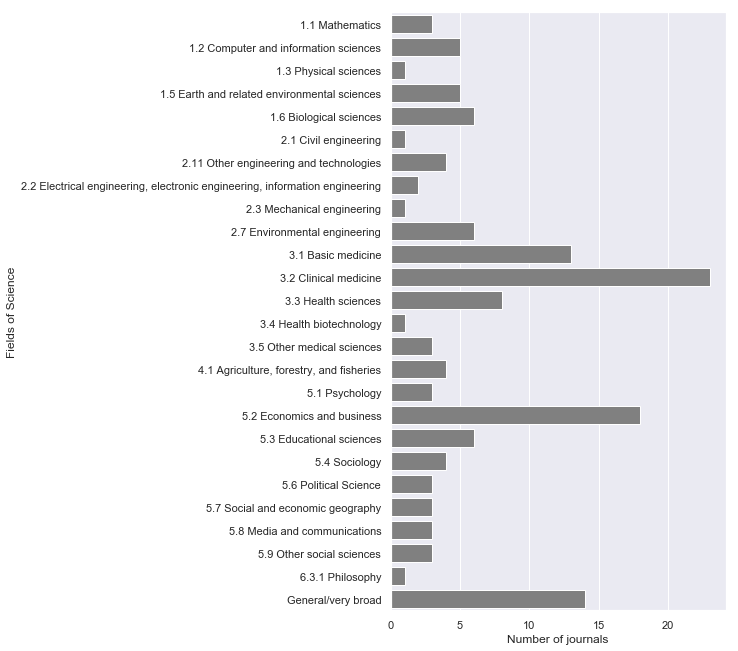

In [8]:
# Supplementary material 1. Table of distribution of POA journals (absolute counts and proportions) 
# classified by Fields of Science coding scheme level 2 (N = 144)
counts2 = df.groupby(['fos_lv2'])['journal_id'].nunique().reset_index().rename(columns=
                                                                              {'fos_lv2':'Field of science code',
                                                                               'journal_id':'N journals'}
                                                                             )
counts2['Proportion'] = np.round((counts2['N journals'] / counts2['N journals'].sum()), decimals=4)

# Supplementary material 1. Distribution of POA journals (absolute counts) 
# classified by Fields of Science coding scheme level 2 (N = 144)
ax = plt.subplots(figsize=(6,11))

ax = sns.barplot(x = 'N journals', 
                 y = 'Field of science code', 
                 data=counts2, 
                 color='Grey')

ax.set( ylabel='Fields of Science',
       xlabel="Number of journals")

display(counts2)
plt.show()

## Number (and column-wise proportions) of POA, DOAJ indexed and peer-reviewed publications with n authors

In [9]:
table3 = pd.DataFrame(df.groupby(['number_of_auth_tot_article'])['pub_id'].nunique().reset_index().rename(columns=
                                                                                 {'number_of_auth_tot_article':'Number of authors listed',
                                                                                 'pub_id':'POA publications'}))
table3['Proportion (column wise)'] = np.round((table3['POA publications']/table3['POA publications'].sum()), decimals=4)
display(table3)

,Number of authors listed,POA publications,Proportion (column wise)
0,1,23,0.1095
1,2,46,0.2190
2,3,41,0.1952
3,4,39,0.1857
4,5,24,0.1143
5,6,9,0.0429
6,7,10,0.0476
7,8,11,0.0524
8,9,3,0.0143
9,10,2,0.0095


## Average proportion of senior authors relative to all authors (senior and junior) for POA publications


The average proportion of senior authors is determined as follows:

\begin{equation*}
P = \frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{|A_i|} \frac{a_{j}^{i}}{|A_i|}
\end{equation*}


Here, $N$ is the number of publications, $A_i$ is the set of identified authors ${a_1^i,…,a_{|A_i|}^i}$ of publication  $i$, and ${|A_i |}$ is the number of identified authors of publication $i$. 
$a_j^i=1$ if author $j$ is a senior author, and 0 otherwise.
$P$ ranges from 0 (no contribution by senior authors) to 1 (no contribution by junior authors).

In [10]:
def average_prop_senior_authors(df):
    df2 = df.copy()
    df2['seniortmp'] = df2.senior / df2.number_of_auth_in_VABB
    share_senior = df2.groupby('pub_id')['seniortmp'].sum().to_frame('share_senior')
    df2 = df2.merge(share_senior, left_on='pub_id', right_index=True, how='left')
    
    return pd.DataFrame(df2.groupby('pub_year').mean()['share_senior']).reset_index().rename(columns={'share_senior':'Average proportion',
                                                                                                     'pub_year': 'Year'})

average_prop_senior_authors(df)

,Year,Average proportion
0,2004,1.0000
1,2005,0.7500
2,2006,0.9474
3,2007,0.7586
4,2008,0.7652
5,2009,0.8095
6,2010,0.9143
7,2011,0.8600
8,2012,0.6667
9,2013,0.6071


## Proportion of junior vs. senior authors positioned first in the author byline of POA publications

,Number of authors listed,status,Proportion of junior or senior listed first
0,2,Junior,0.4286
1,2,Senior,0.4773
2,3,Junior,0.7500
3,3,Senior,0.2000
4,4,Junior,0.5517
5,4,Senior,0.1899
6,5+,Junior,0.2414
7,5+,Senior,0.1389


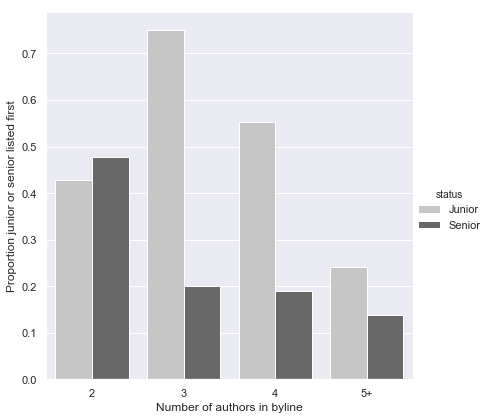

In [11]:
df_temp = df[['pub_id', 'senior', 'auth_in_place', 'number_of_auth_tot_article']]

df_temp = df_temp.loc[df_temp['number_of_auth_tot_article'] != 1]

df_temp['number_of_auth_tot_article'] = df_temp['number_of_auth_tot_article'].where(df_temp['number_of_auth_tot_article'] <= 4,'5+')
df_temp['auth_in_place'] = df_temp['auth_in_place'].where(df_temp['auth_in_place'] <= 1, 'Rest')
df_temp['senior'] = np.where(df_temp['senior'] >= 1, 'Senior', 'Junior')

df_temp_first = df_temp.loc[df_temp['auth_in_place'] == 1]
df_temp = df_temp.groupby(['number_of_auth_tot_article', 'senior'])['pub_id'].size().reset_index()
df_temp_first = df_temp_first.groupby(['number_of_auth_tot_article', 'senior'])['pub_id'].size().reset_index()

df_temp['Proportion of junior or senior listed first'] = df_temp_first['pub_id']/df_temp['pub_id']

df_temp = df_temp.drop(columns='pub_id')
df_temp = df_temp.rename(index=str, columns={"number_of_auth_tot_article": "Number of authors listed", 
                                   "senior": "status",
                                  })
ax = sns.catplot(x="Number of authors listed", 
                 y="Proportion of junior or senior listed first", 
                 hue="status",
                 hue_order=['Junior','Senior'],
                 data=df_temp, 
                 height=6, 
                 kind="bar",
                 palette="Greys")
ax.set(xlabel='Number of authors in byline', ylabel='Proportion junior or senior listed first')
display(df_temp)
plt.show()

## Heatmap of cognitive (rows) and organizational (columns) classification of POA publications

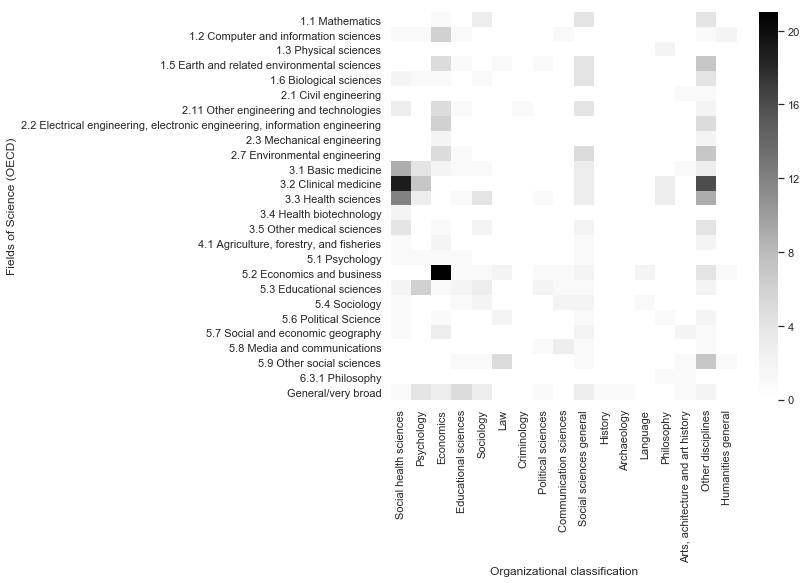

In [12]:
df_disc = df.drop_duplicates(subset='pub_id')
df_disc = df_disc[['fos_lv2', 'Social health sciences',
       'Psychology', 'Economics', 'Educational sciences', 'Sociology', 'Law',
       'Criminology', 'Political sciences', 'Communication sciences',
       'Social sciences general', 'History', 'Archaeology', 'Language',
       'Philosophy', 'Arts, achitecture and art history', 'Other disciplines',
       'Humanities general']]

df_disc = df_disc.groupby(['fos_lv2'])['Social health sciences',
       'Psychology', 'Economics', 'Educational sciences', 'Sociology', 'Law',
       'Criminology', 'Political sciences', 'Communication sciences',
       'Social sciences general', 'History', 'Archaeology', 'Language',
       'Philosophy', 'Arts, achitecture and art history', 'Other disciplines',
       'Humanities general'].sum()

fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.set(font_scale=1)
ax = sns.heatmap(df_disc, cmap="Greys", ax=ax)
ax.set(xlabel='Organizational classification', ylabel='Fields of Science (OECD)')
plt.tight_layout()
plt.show()